### I. The Distribution of Words in a Human Language: Zipf's Law

In this problem, you will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English). As it turns out, when we look at the distribution of words in a different human languages, the distribution roughly follows what's called *Zipf's law* ([Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)).

*Zipf's law* states that given a large sample of words used, any word's frequency is inversely proportional to its rank in the frequency table (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.


(a) Read the data files.

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project ([https://www.gutenberg.org/browse/scores/top](https://www.gutenberg.org/browse/scores/top)). Each file contains the text of a book. Now read all the texts from disk. This will be the corpus in this problem.

In [28]:
import glob
import spacy
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
filenames = glob.glob('./Dataset/*.txt')
text = ''
# open text file from all files as text
for filename in filenames:
    text += open(filename).read()

(b) Build the frequency table. Specifically, complete the following three tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Then count the number of times each word appears in the corpus and build a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)
  3. Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). 

In [10]:
import re  # regular expression package
from operator import itemgetter
from collections import Counter
import pandas as pd

# split text into n chunks due to maximum nlp limit
nlp_limit = 1000000
parts = [text[i:i + nlp_limit] for i in range(0, len(text), nlp_limit)]

nlp.max_length=10000000

In [11]:
# lemmatizing words and count frequency
histogram = Counter()
for txt in parts:
    parsed_text = nlp(txt)
    for token in parsed_text:
        lemma = token.lemma_.lower()
        if re.match('[a-zA-Z]+$', lemma):
            histogram[lemma] += 1

In [12]:
# build a frequency table
frequency_table = pd.DataFrame(histogram,index=[0]).T.reset_index()
frequency_table.columns = ['word', 'frequency']
frequency_table.head()

,word,frequency
0,project,8303
1,gutenberg,7969
2,ebook,1003
3,of,265773
4,democracy,425


In [13]:
# sort the table
frequency_table = frequency_table.sort_values(
    by=['frequency'], ascending=False)
frequency_table = frequency_table.reset_index()
del (frequency_table['index'])
frequency_table = frequency_table.reset_index()
frequency_table.columns = ['rank', 'word', 'frequency']
frequency_table = frequency_table[['word', 'frequency', 'rank']]
frequency_table['rank'] = frequency_table['rank'] + 1
frequency_table.head(50)

,word,frequency,rank
0,the,482387,1
1,be,300270,2
2,and,286523,3
3,of,265773,4
4,a,250122,5
5,to,228817,6
6,in,144199,7
7,i,136732,8
8,have,128798,9
9,that,110230,10


(c) Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

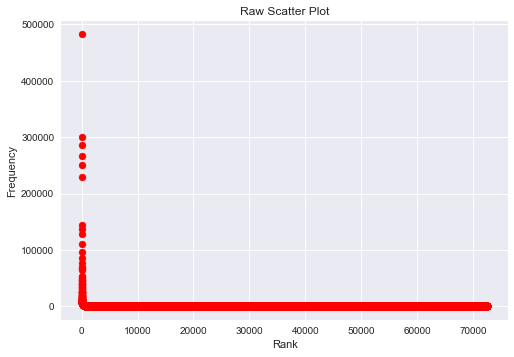

In [15]:
# Raw scatter plot
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.scatter(frequency_table['rank'], frequency_table['frequency'],color = 'r')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Raw Scatter Plot')
plt.show()

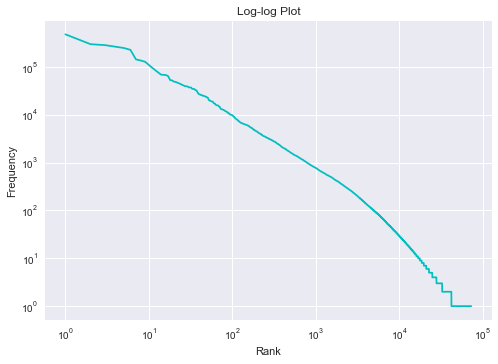

In [16]:
# Log-log plot
plt.loglog(frequency_table['rank'], frequency_table['frequency'],color = 'c')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Log-log Plot')
plt.show()

(d) Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

- What do you observe in the log-log plot above? Is this consist with the power law?

It is like a downward parabola which is consistent with the power law. But in the plot, the higher ranks are with higher freuqency than $f(r)$ calculated by the power law.

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? 

In [17]:
print('Probability of drawing one of the 4 most frequent words: ')
# frequency = frequency_table[2].values
total_frequency = frequency_table['frequency'].sum()
top_4_frequency = frequency_table['frequency'][0:4].sum()
prob_4 = top_4_frequency / total_frequency
print(prob_4)

print('Probability of drawing one of the 50 most frequent words: ')
top_50_frequency = frequency_table['frequency'][0:50].sum()
prob_50 = top_50_frequency / total_frequency
print(prob_50)

Probability of drawing one of the 4 most frequent words: 
0.16124706468674874
Probability of drawing one of the 50 most frequent words: 
0.4853947895917455


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [18]:
print("Occur only once: ")
once_words = len(frequency_table[frequency_table["frequency"] == 1])
total_words = len(frequency_table)
once = once_words / total_words
print(once)

Occur only once: 
0.4223590506494759


In [19]:
print("Occur fewer than 10 times: ")
fewer_10_words = len(frequency_table[frequency_table["frequency"] < 10])
fewer_10 = fewer_10_words / total_words
print(fewer_10)

Occur fewer than 10 times: 
0.7579376558259984


### II. Entity Recognition and Pointwise Mutual Information (PMI) 
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing or the part-of-speech tagging. Hence, you will want to instantiate the nlp object by calling:

`
nlp = spacy.load('en', disable=['parser', 'tagger'])
`


(a) Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [20]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en', disable=['parser', 'tagger'])
# hint: when first debugging, consider looking at just the first few
reuters_fileids = reuters.fileids()
reuters_nlp = [
    nlp(re.sub('\s+', ' ', reuters.raw(i)).strip()) for i in reuters_fileids
]
label_counter = Counter()

In [21]:
# count frequency for entity labels
for text in reuters_nlp:
    for entity in text.ents:
        label_counter[entity.label_] +=1

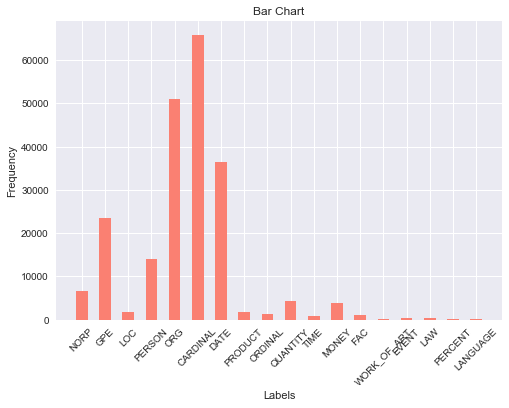

In [22]:
# draw a bar chart
plt.style.use('seaborn')
plt.bar(range(len(label_counter)), list(label_counter.values()), width=0.5, color="salmon")
plt.xticks(range(len(label_counter)), list(label_counter.keys()),rotation=45)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Bar Chart')
plt.show()

(b) Now list the top 10 most frequently occured entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (countries, cities, states) respectively.

Note: Here, when counting the frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.  List filtering will be helpful here.

In [26]:
# count frequency for entities with labels ORG and GRE
entity_counter_ORG = Counter()
entity_counter_GPE = Counter()
for article in reuters_nlp:
    article_ORG = set([
        entity.lemma_.lower() for entity in article.ents
        if entity.label_ == 'ORG'
    ])
    article_GPE = set([
        entity.lemma_.lower() for entity in article.ents
        if entity.label_ == 'GPE'
    ])
    # https://docs.python.org/2/library/collections.html#collections.Counter
    entity_counter_ORG.update(article_ORG)
    entity_counter_GPE.update(article_GPE)

# sort two counters
from operator import itemgetter
sorted_entity_count_pairs_ORG = sorted(
    entity_counter_ORG.items(), reverse=True, key=itemgetter(1))
sorted_entity_count_pairs_GRE = sorted(
    entity_counter_GPE.items(), reverse=True, key=itemgetter(1))

# print top 10 most frequently occured entities in two sorted counters
print('Top 10 most frequently occured entities with label ORG')
for entity, count in sorted_entity_count_pairs_ORG[0:10]:
    print(entity, ":", count)

print('\nTop 10 most frequently occured entities with label GRE')
for entity, count in sorted_entity_count_pairs_GRE[0:10]:
    print(entity, ":", count)

Top 10 most frequently occured entities with label ORG
avg : 583
reuters : 445
the securities and exchange commission : 246
ec : 240
usda : 226
fed : 220
net : 203
treasury : 183
the u.s. agriculture department : 170
congress : 139

Top 10 most frequently occured entities with label GRE
u.s. : 1666
shr : 690
japan : 588
the united states : 375
u.k. : 309
canada : 291
new york : 271
washington : 240
west germany : 234
london : 212


(c) Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Note 1: When computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Note 2: To compute this ranking, you do not have to compute the full PMI equation.

In [27]:
counter_co = Counter()
counter_GPE = Counter()
for article in reuters_nlp:
    article_ORG = set([
        entity.lemma_.lower() for entity in article.ents
        if entity.label_ == 'ORG'
    ])
    article_GPE = set([
        entity.lemma_.lower() for entity in article.ents
        if entity.label_ == 'GPE'
    ])
    if 'opec' in article_ORG:
        counter_co.update(article_GPE)
    counter_GPE.update(article_GPE)

PMI = []
for entity, count in counter_co.items():
    part_PMI = count / counter_GPE[entity]
    PMI.append([entity, count, counter_GPE[entity], part_PMI])
PMI = pd.DataFrame(PMI)
PMI.columns = ['entity', 'co-occurance count', 'GPE count', 'part_PMI']
PMI = PMI.sort_values(by=['part_PMI'], ascending=False)
PMI = PMI.reset_index()
del (PMI['index'])
PMI = PMI.reset_index()
PMI.columns = ['rank', 'entity', 'co-occurance count', 'GPE count', 'part_PMI']
PMI = PMI[['entity', 'co-occurance count', 'GPE count', 'part_PMI', 'rank']]
PMI['rank'] = PMI['rank'] + 1
PMI.head(50)

,entity,co-occurance count,GPE count,part_PMI,rank
0,balao,4,4,1.000000,1
1,the lake charles,1,1,1.000000,2
2,pgrt,1,1,1.000000,3
3,doha,1,1,1.000000,4
4,saudi arabia 's,1,1,1.000000,5
5,i.e.,1,1,1.000000,6
6,nazir,1,1,1.000000,7
7,tripoli,2,2,1.000000,8
8,l.f.,1,1,1.000000,9
9,emirates,2,2,1.000000,10


For example, 'easter' and 'bethesda' seem to be unrelated with OPEC, which are unexpected results. 
It is may because these words rarely occurance in articles, that each frequency of them is only once. Thus the PMI would be really high due to the formula. Also, these words maybe misclassied by spacy, which are obviously not geography words. 

However, the countries kuwait and saudi arabia, are expected since they are members of OPEC. 